In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
data1
= pd.read_excel(r"C:\Users\USER\Downloads\Country-Code.xlsx")

In [20]:
data1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [21]:
data1.shape

(15, 2)

In [22]:
data1.describe()

,Country Code
count,15.000000
mean,137.933333
std,80.009345
min,1.000000
25%,65.500000
50%,166.000000
75%,199.500000
max,216.000000


In [23]:
data1.dtypes

Country Code     int64
Country         object
dtype: object

In [24]:
data1.isnull()

,Country Code,Country
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [26]:
final_data=pd.merge(data,data1,on='Country Code',how='left')
final_data.head()

,Country Code,Country_x,Country_y
0,1,India,India
1,14,Australia,Australia
2,30,Brazil,Brazil
3,37,Canada,Canada
4,94,Indonesia,Indonesia


In [27]:
final_data.shape

(15, 3)

In [34]:
final_data.Country.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Country'

In [35]:
final_data.Country

AttributeError: 'DataFrame' object has no attribute 'Country'

In [36]:
import plotly.graph_objects as plt

labels = country_name
values = country_value

fig = plt.Figure(data=[plt.Pie(labels=labels[:5], values=values[:5])])
fig.show()

NameError: name 'country_name' is not defined

In [31]:
ratings = data.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

KeyError: 'Aggregate rating'

In [32]:
import plotly.express as px

fig = px.bar(ratings, 
                   x='Rating color', 
                   #marginal='box', 
                   color='Rating text',
             y='Rating Count', 
                   color_discrete_sequence=['White', 'Red','Orange','Yellow','Green',"Darkgreen"], 
                   title='Rating Distribution')
fig.update_layout(bargap=0.1)
fig.show()

NameError: name 'ratings' is not defined

In [37]:
No_rating = final_data[final_data['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

KeyError: 'Rating color'

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)
plt.show()

NameError: name 'ratings' is not defined

<Figure size 1200x600 with 0 Axes>

In [39]:
country_currency = final_data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency

KeyError: "None of [Index(['Country', 'Currency'], dtype='object')] are in the [columns]"

In [40]:
fig = px.pie(final_data, names="Has Online delivery", title='Online Deliveries')
fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['Country Code', 'Country_x', 'Country_y'] but received: Has Online delivery

In [41]:
country_online_delivery = final_data[["Has Online delivery", 'Country']].groupby(["Has Online delivery", 'Country']).size().reset_index(name='Count')
country_online_delivery

KeyError: "None of [Index(['Has Online delivery', 'Country'], dtype='object')] are in the [columns]"

In [42]:

final_data.loc[final_data['Rating text'].isin(['Excellent'])].Cuisines.value_counts().sort_values(ascending=False).reset_index().head()

KeyError: 'Rating text'

In [43]:
good_cuisine = final_data.loc[final_data['Rating text'].isin(['Excellent'])]

good_cuisine = good_cuisine.Cuisines.value_counts().reset_index().head(25)

## Extracing all the cuisens in a single list
cuisines = []

for cuisine in good_cuisine['index']: 
  cuisines.append(cuisine)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisines

KeyError: 'Rating text'

In [44]:
sns.barplot(y = 'index', x = 'Cuisines', data = good_cuisine)
plt.show()

NameError: name 'good_cuisine' is not defined

In [45]:
costly_zomato = final_data.nlargest(25, 'Average Cost for two')
costly_zomato

KeyError: 'Average Cost for two'

In [46]:
costly_zomato.columns

NameError: name 'costly_zomato' is not defined

In [47]:
fig = px.bar(costly_zomato, 
                   x='Restaurant Name', 
                   color='City',
                 y='Average Cost for two', 
                 title='Costly restaurants around the globe for 2 people')
fig.update_layout(bargap=0.1)
fig.show()

NameError: name 'costly_zomato' is not defined

In [48]:
final_data.columns

Index(['Country Code', 'Country_x', 'Country_y'], dtype='object')

In [49]:
import plotly.express as px

fig = px.scatter_mapbox(final_data, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", 
                                                                                            "Restaurant Name","Average Cost for two",
                                                                                            "Price range", 'Rating text'],
                        color_discrete_sequence=["green"], zoom=10, height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Top 25 costly Resturants Location',
                  autosize=True,
                  showlegend=False)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['Country Code', 'Country_x', 'Country_y'] but received: City

In [50]:
final_data[(final_data['Average Cost for two']<10000) & (final_data['Aggregate rating']!=0)].plot.scatter(x = 'Average Cost for two', y = 'Aggregate rating', figsize=(15,7), title="The dependence of the rating on the price for two")
plt.show()

KeyError: 'Average Cost for two'

KeyError: 'Aggregate rating'

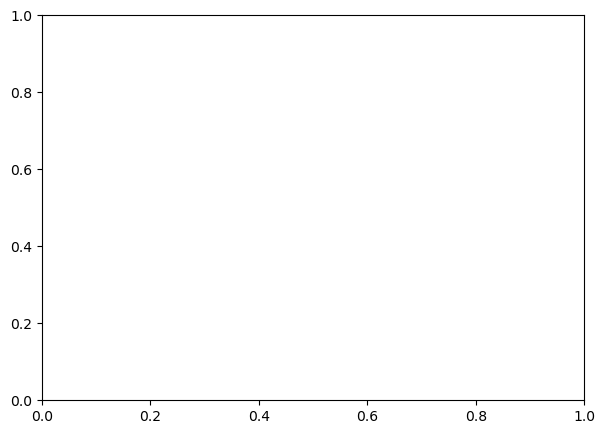

In [51]:
scatter_price_rating = final_data.plot.scatter('Aggregate rating','Votes',figsize = (7,5))
plt.title("Relationship betweeen Votes and Aggregate rating")
plt.show()

In [52]:
n = ['Price range', 'Aggregate rating', 'Votes', 'Average Cost for two']
sns.pairplot(final_data[n])
plt.show()

KeyError: "None of [Index(['Price range', 'Aggregate rating', 'Votes', 'Average Cost for two'], dtype='object')] are in the [columns]"

In [53]:
final_data['Restaurant Name'].value_counts()

KeyError: 'Restaurant Name'

In [54]:
final_data[["Average Cost for two"]].mean()

KeyError: "None of [Index(['Average Cost for two'], dtype='object')] are in the [columns]"

In [55]:
sns.boxplot(x = "Has Table booking", y = "Aggregate rating", data = final_data)
plt.title('The dependence of the rating on the availability of table reservations')
plt.show()

ValueError: Could not interpret input 'Has Table booking'

In [56]:
sns.boxplot(x = "Is delivering now", y = "Aggregate rating", data = final_data)
plt.title('The dependence of the rating on the availability of delivery')
plt.show()

ValueError: Could not interpret input 'Is delivering now'

In [57]:
import plotly.graph_objects as go
Delhi = data[(data.City == 'New Delhi')]
fig = go.Figure(data=[go.Bar(
    x=Delhi.Locality.value_counts().head(10).index,
    y=Delhi.Locality.value_counts().head(10),
    
)])

fig.show()

AttributeError: 'DataFrame' object has no attribute 'City'

In [58]:
cuisine_val = data.Cuisines.value_counts()             
cuisine_label = data.Cuisines.value_counts().index 
fig = go.Figure(data=[go.Pie(labels=cuisine_label[:10], values=cuisine_val[:10], textinfo='label+percent',
                             insidetextorientation='radial',title='Top 10 Cuisine'
                            )])
fig.show()

AttributeError: 'DataFrame' object has no attribute 'Cuisines'

In [59]:
top_locality = Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

NameError: name 'Delhi' is not defined

In [60]:
import plotly.express as px

fig = px.scatter(Delhi, x="Average Cost for two", y="Aggregate rating", color='Price range',)
fig.show()

NameError: name 'Delhi' is not defined

In [61]:
Delhi['Rating text'].value_counts()

NameError: name 'Delhi' is not defined

In [62]:
High_rating = Delhi[Delhi['Rating text'].isin(['Excellent'])]
fig = px.scatter_mapbox(High_rating, lat="Latitude", lon="Longitude", hover_name="City",
                        hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Highle rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)


NameError: name 'Delhi' is not defined

In [63]:
k = data[(data.City == 'Kolkata')]
k.head(15)

AttributeError: 'DataFrame' object has no attribute 'City'

In [64]:
fig = px.bar(k, 
                   x=k.Locality, 
                   #marginal='box', 
                   color=k['Has Table booking'],
             #y=k.Locality.value_counts().head(10).index, 
                   #color_discrete_sequence=['Grey', 'Red','Orange','Yellow','Green',"Darkgreen"], 
                   title='Restaurants having table booking and its count for Kolkata')
fig.update_layout(bargap=0.1)
fig.show()

NameError: name 'k' is not defined

In [65]:
k2=k.nlargest(25, 'Average Cost for two')
k2

NameError: name 'k' is not defined

In [66]:
import plotly.express as px


fig = px.scatter_mapbox(k2, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", 
                                                                                            "Restaurant Name","Average Cost for two",
                                                                                            "Has Table booking"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Top 25 costly Resturants Location',
                  autosize=True,
                  #hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

NameError: name 'k2' is not defined

In [67]:
ax = px.bar(k2, x='Restaurant Name', 
            y='Average Cost for two',
            hover_data=['Has Online delivery'] ,
            title = 'Top 25 costly restaurant')
ax.show()

NameError: name 'k2' is not defined